In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.interpolate import interp1d

In [6]:
with open("statsRes.pkl", "rb") as f:
    mse, sse, me = pickle.load(f)

In [7]:
print(mse)

[8.357714589341896e-09, 8.549427591161512e-09, 8.550395091014935e-09, 8.54001393145162e-09, 8.546377765101806e-09, 8.54450894308097e-09, 8.562584891077135e-09, 8.538550877954808e-09, 8.541343785090618e-09]


Text(0.5, 0, 'Steps')

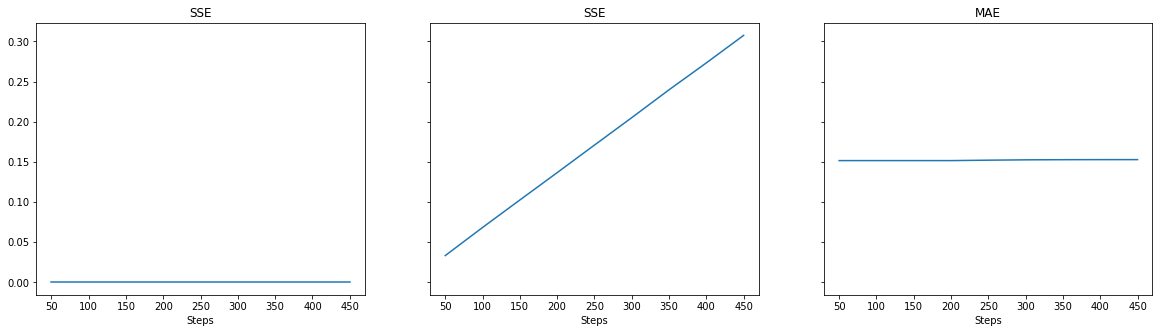

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

x = range(50, 500, 50)

ax[0].plot(x, mse)
ax[0].set_title("SSE")
ax[0].set_xlabel("Steps")

ax[1].plot(x, sse)
ax[1].set_title("SSE")
ax[1].set_xlabel("Steps")

ax[2].plot(x, me)
ax[2].set_title("MAE")
ax[2].set_xlabel("Steps")

In [56]:
SAMPLE_FILE = "filtered.pkl"
SIGNAL_FOLDER = "D:/SamplingResults2"
def get():
    pts = list(range(50, 500, 50))

    f = open(f"{SAMPLE_FILE}", "rb")
    samples = pickle.load(f)
    print(len(samples))
    f.close()
    for steps in pts:
        print(f"Running for step size: {steps}")
        x_interped = []
        x_origin = []

        exps = os.listdir(f"{SIGNAL_FOLDER}/")
        fail = False

        for run in exps:
            print(f"   Run: {run}")
            inp = []
            fail = False
            files = os.listdir(f"{SIGNAL_FOLDER}/{run}/")

            if files != ['Disp1.csv', 'Disp2.csv']:
                continue

            processed = 0
            for file in files:
                a = pd.read_csv(f"{SIGNAL_FOLDER}/{run}/{file}")
                a.rename(columns = {'0':'x', '0.1': 'y'}, inplace = True)

                # Interpolate curve for consistent x values
                xNew = np.linspace(0, 7, num=steps, endpoint=False)
                interped = interp1d(a['x'], a['y'], kind='cubic', fill_value="extrapolate")(xNew)
                if a['x'].max() != 7.0:
                    fail = True

                    break

                # Find closest value in original to interpreted
                orig = np.array(a['y'].values)
                closest = []

                for y in interped:
                    diff = []
                    for y_2 in orig:
                        # Get difference
                        diff.append(abs(y_2 - y))




                    # Find location of smallest difference
                    idx = np.array(diff).argmin()

                    print(f"Closest point to interped y: {y} is {orig[idx]}, left: {orig[idx-5]}, right: {orig[idx+50]}")
                    print(orig)
                    a.plot(x="x", y="y")
                    raise Exception()
                    # Use as representative point
                    closest.append(orig[idx])

                x_interped.append(interped.astype(np.float32))
                x_origin.append(closest)
                processed += 1

            if fail and processed == 1:
                del x_interped[-1]
                del x_origin[-1]

        x_origin = np.array(x_origin).flatten()
        x_interped = np.array(x_interped).flatten()
        mse.append(mean_squared_error(x_origin, x_interped))
        sse.append(mse[-1]*len(x_origin))
        me.append(np.max(np.absolute(np.array(x_origin) - np.array(x_interped))))

    return mse, sse, me

    print(f"{mse}\n\n {sse}\n\n {me}")



1362
Running for step size: 50
   Run: 0
Closest point to interped y: -3.776304109583756e-05 is -3.17617085499999e-05, left: -3.17617085099997e-05, right: -3.17617085499999e-05
[ 0.00000000e+00  6.04867460e-05  1.42632162e-04  2.42067436e-04
  3.57025689e-04  4.87377558e-04  6.31609859e-04  7.05819096e-04
  7.47517332e-04  7.73067619e-04  7.89591730e-04  8.00621637e-04
  8.08124105e-04  8.13286981e-04  8.16866614e-04  8.19360625e-04
  8.21103855e-04  8.22324892e-04  8.23181336e-04  8.23782575e-04
  8.24204881e-04  8.24501599e-04  8.24710112e-04  8.24856652e-04
  8.24959640e-04  8.25032018e-04  8.25082883e-04  8.25118628e-04
  8.25143745e-04  8.25161395e-04  8.25173796e-04  8.25182510e-04
  8.25188632e-04  8.25192933e-04  8.25195955e-04  8.25198078e-04
  8.25199569e-04  8.25200617e-04  8.25201353e-04  8.25201871e-04
  8.25202234e-04  8.25202489e-04  8.25202668e-04  8.25202794e-04
  8.25202883e-04  8.25202945e-04  8.25202989e-04  8.25203019e-04
  8.25203041e-04  8.25203056e-04  8.2520306

Exception: 

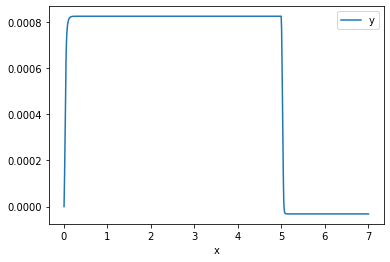

In [57]:
get()